In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

##**Machine Learning for Predicting Climate Extremes**


Author(s):
*   Hritik Bansal, University of California Los Angeles, hbansal@g.ucla.edu
*   Shashank Goel, University of California Los Angeles, shashankgoel@g.ucla.edu
*   Tung Nguyen,   University of California Los Angeles, tungnd@g.ucla.edu
*   Aditya Grover, University of California Los Angeles, adityag@cs.ucla.edu

# Table of Contents

*   [Target Audience](#target-audience)
*   [Overview](#overview)
*   [Contributions](#contributions)
*   [Software Requirements](software-requirements)
*   [Data Source](data-source)
*   [Temporal Forecasting](temporal-forecasting)
*   [Spatial Downscaling](spatial-downscaling)

<a name="target-audience"></a>
# Target Audience


*   Climate scientists seeking to explore ML tools, technologies, and resources to tackle a domain-specific problem in climate change. 
*   Data scientists with prior background in deep learning looking for concrete examples on how to model climate extremes using AI.

<a name="overview"></a>
# Overview

Climate change has led to a rapid increase in the occurrence of extreme weather events globally, including floods, droughts, and wildfires. In the longer term, some regions will experience aridification while others will risk sinking due to rising sea levels. Typically, such predictions are done via weather and climate models that simulate the physical interactions between the atmospheric, oceanic, and land surface processes that operate at different scales. Due to the inherent complexity, these climate models can be inaccurate or computationally expensive to run, especially for detecting climate extremes at high spatiotemporal resolutions. In this tutorial, we aim to introduce the participants to machine learning approaches for addressing two fundamental challenges:

(1) **Temporal Forecasting**: The goal is to predict climate variables into the future. \
(2) **Spatial Downscaling**: The goal is to learn a mapping that transforms low-resolution outputs of climate models into high-resolution regional forecasts. 

We illustrate the two key challenges in predicting temperature, a key indicator of global warming levels around the world, in the figure below. Given a temperature grid at a particular resolution **R** at a time stamp **T**, temporal forecasting focuses on predicting the temperature at a future time stamp **T+H** where **H** is the prediction horizon whereas the climate downscaling focuses on predicting the temperature at the same timestep T but at a higher resolution **(R' > R)**. 

<a name="contributions"></a>
# Contributions

Through introductory presentations and colab notebooks, we aim to expose the participants to: 

(a) **APIs** for accessing and navigating popular repositories that host global climate data, such as the Copernicus data store. \
(b) Identifying **relevant datasets** and providing functionality to preprocess them. \
(c) **Algorithms** for training machine learning models. \
(d) **Metrics** for evaluating model performance. \
(e) **Visualization** tools for both the dataset and predicted outputs. 

<a name="software-requirements"></a>
# Software Requirements
This notebook requires the following libraries:
*   climate_learn (pip)

`climate_learn` contains the source files used for modeling climate extremes.

The package is written using `PyTorch` machine learning library.

**In order to download meteorological data in a certain area of the world, I have modified a version of the program. To use this function, the following libraries should be installed. If an error appears, simply restart the runtime and the program should run smoothly. Once the libraries are installed, follow the instructions I have written in bold to complete the download.** 

In [ ]:
%%bash
python -m pip install --upgrade pip
#pip install git+https://github.com/aditya-grover/climate-learn.git
pip install git+https://github.com/ProfessorGuineapig/climate-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ProfessorGuineapig/climate-learn to /tmp/pip-req-build-b61azlmj
  Resolved https://github.com/ProfessorGuineapig/climate-learn to commit 2aed25b00b90ccb5eae1207ac8259a73d74def82
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Pr

  Running command git clone --filter=blob:none --quiet https://github.com/ProfessorGuineapig/climate-learn /tmp/pip-req-build-b61azlmj


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install climetlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a name="data-source"></a>
# Data Source

[1] provides a comprehensive list of typical datasets and benchmarks for weather prediction. 

Among the list of popular datasets, we focus this tutorial on the **ERA5** dataset that provides an hourly estimate of a large number of atmospheric, land and oceanic climate variables. 

<br>
<center><img src="https://cds.climate.copernicus.eu/sites/default/files/cdsapp/copernicus-logo.png" width=300></center>
<br>

ERA5 consists of the climate variable data from 1959 to present. The ERA5 dataset is freely-accessible to the community on the Climate Data Store [(CDS)](https://cds.climate.copernicus.eu/#!/search?text=ERA5&type=dataset) hosted by the European Union's Earth observation programme, [Copernicus](https://www.copernicus.eu/en/about-copernicus).  The users can visit [https://cds.climate.copernicus.eu/api-how-to](https://cds.climate.copernicus.eu/api-how-to#install-the-cds-api-key) to install the CDS API key required to access their data. 




The authors from [2] (WeatherBench dataset) downloaded the ERA5 data from CDS API for a subset of climate variable and preprocessed it at multiple resolutions. The data is freely accessible to anyone at [https://dataserv.ub.tum.de/index.php/s/m1524895?path=%2F](https://dataserv.ub.tum.de/index.php/s/m1524895?path=%2F).

<br>
<center><img src="https://github.com/ai4environment/WeatherBench/raw/master/figures/logo_text_left.png?raw=true" width=500></center>
<br>

_Our package provides the users with a way to download data from ERA5 as well as WeatherBench depending upon their application._



<br/><br/>

**References:**

[1] Ren X, Li X, Ren K, Song J, Xu Z, Deng K, Wang X. Deep learning-based weather prediction: a survey. Big Data Research. 2021 Feb 15;23:100178 [(Paper)](https://www.sciencedirect.com/science/article/pii/S2214579620300460). \
[2] Rasp S, Dueben PD, Scher S, Weyn JA, Mouatadid S, Thuerey N. WeatherBench: a benchmark data set for data‐driven weather forecasting. Journal of Advances in Modeling Earth Systems. 2020 Nov;12(11):e2020MS002203 [(Paper)](https://arxiv.org/abs/2002.00469).

<a name="temporal-forecasting"></a>
# Temporal Forecasting


A precise and reliable weather forecasting is of great importance in various aspect of society including precipitation forecasts are essential for agricultural needs, wind speed and solar power forecasts for energy generation.

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1_tsaaogqzkYVV0jdawnO9GCJTToW_FCi" height=300></center>

The forecasting task can be categorized into (a) **nowcasting** (timescale of a few hours), (b) weather-scale prediction (typically 1day - 1week), (c) **seasonal** prediction (typically months) and (d) **multi-year or decadal** (timescale of multiple years).

In this tutorial, we shall focus on the **medium-range** weather-scale  prediction of the climate variables i.e., typically 3-5 days in the future. This colab notebook demonstrates the temporal forecasting of the *Temperature* variable at *2m* height above the earth's surface. This variable serves as a good indicator of future temperatures on the Earth's surface for the forecasters. 

We shall further use the 2m temperature data at 5.625 degree resolution that divides the Earth's surface into a latitude x longitude grid of 32 x 64.

<br/><br/>



**References:**
1. Rasp S, Dueben PD, Scher S, Weyn JA, Mouatadid S, Thuerey N. WeatherBench: a benchmark data set for data‐driven weather forecasting. Journal of Advances in Modeling Earth Systems. 2020 Nov;12(11):e2020MS002203 [(Paper)](https://arxiv.org/abs/2002.00469).
2. Civitarese DS, Szwarcman D, Zadrozny B, Watson C. Extreme Precipitation Seasonal Forecast Using a Transformer Neural Network. arXiv preprint arXiv:2107.06846. 2021 Jul 14. [(Paper)](https://arxiv.org/abs/2107.06846)
3. Sønderby CK, Espeholt L, Heek J, Dehghani M, Oliver A, Salimans T, Agrawal S, Hickey J, Kalchbrenner N. Metnet: A neural weather model for precipitation forecasting. arXiv preprint arXiv:2003.12140. 2020 Mar 24. [(Paper)](https://arxiv.org/pdf/2003.12140.pdf)


In [ ]:
from climate_learn.data import download

**Climetlab is a useful tool for visualizing geographical data. It allows users to easily analyze data from a variety of sources. With Climetlab, users can quickly and efficiently create visualizations of the downloaded data. For more detailed instructions on how to use Climetlab, please check out the [Docs](https://climetlab.readthedocs.io/en/latest/overview.html) page.**

In [ ]:
import climetlab as cml
#data = cml.load_source("2m_temperature_1979_0.25deg.nc", "/content/drive/MyDrive/Climate/.climate_tutorial/era5/2m_temperature57_5.625deg.nc")
#"file" is the name of your downloaded data files, the second position is the data file path, which I highly recommend saving on Google Drive.
source = cml.load_source("file", "/content/drive/MyDrive/Climate/.climate_tutorial/era5/0.5/2m_temperature/2m_temperature_1975_0.5deg.nc")

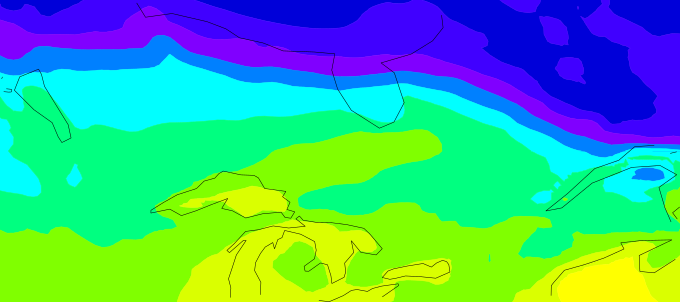

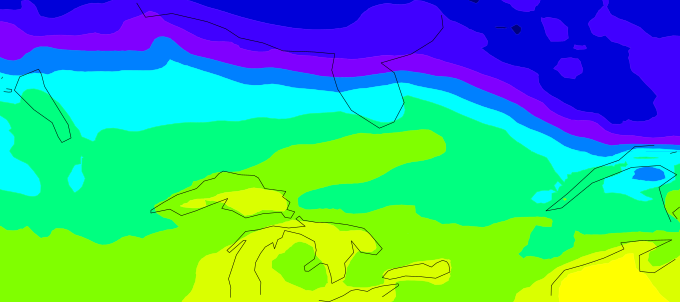

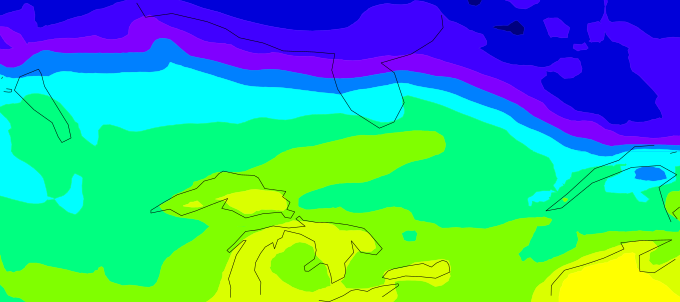

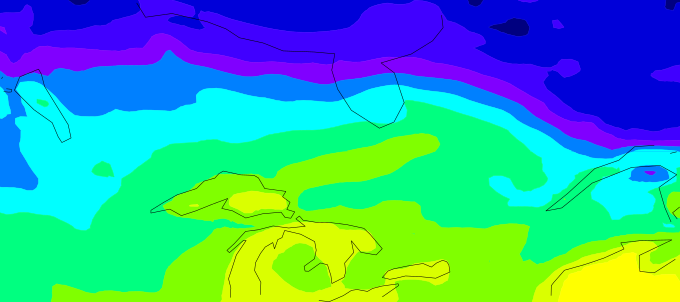

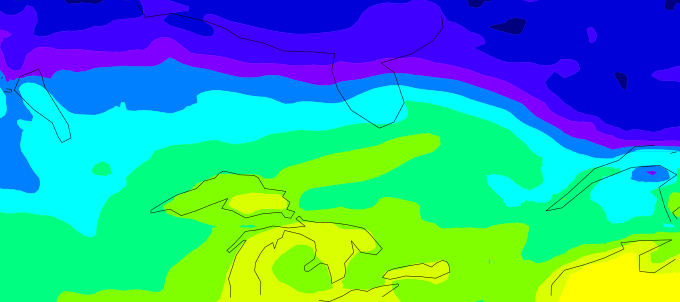

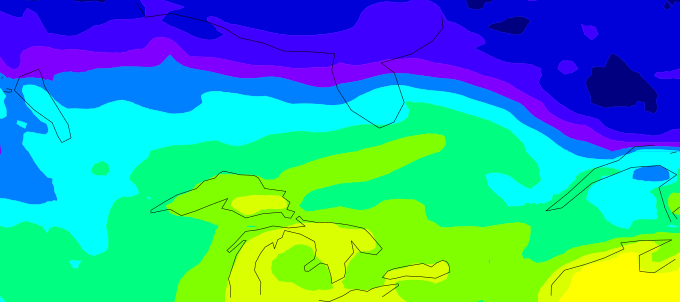

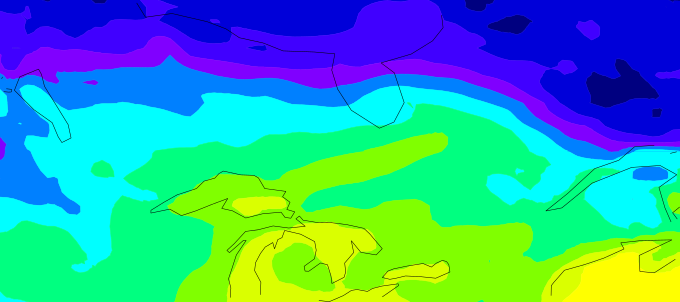

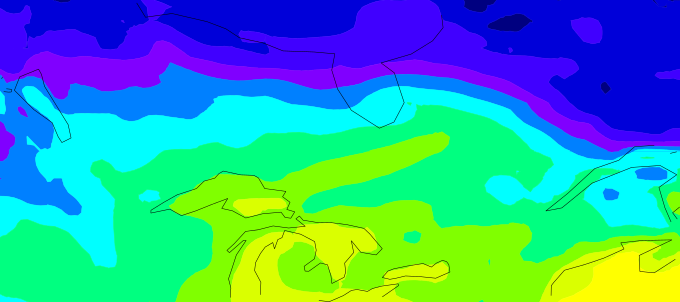

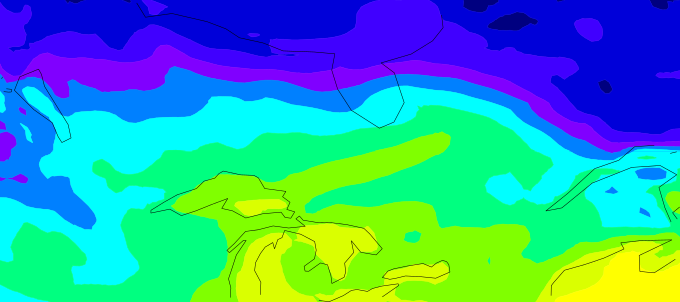

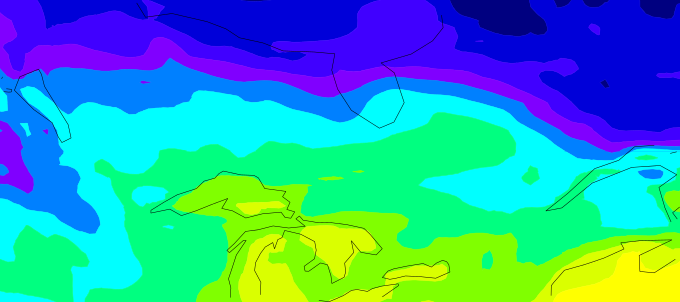

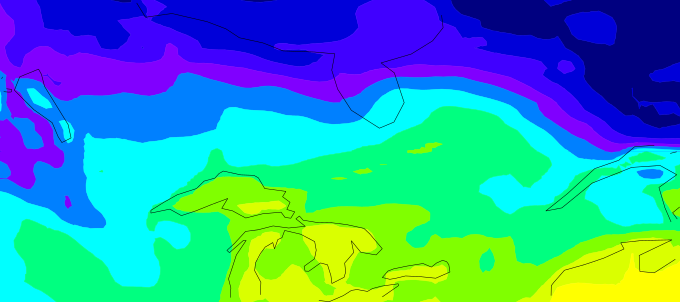

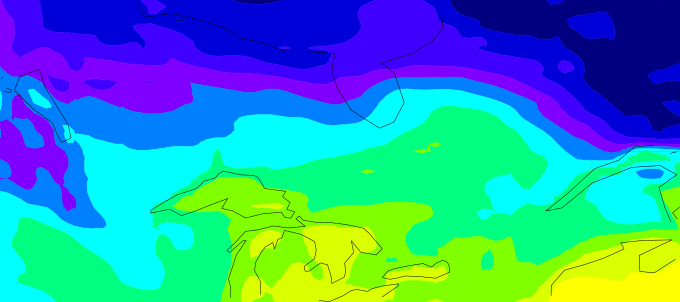

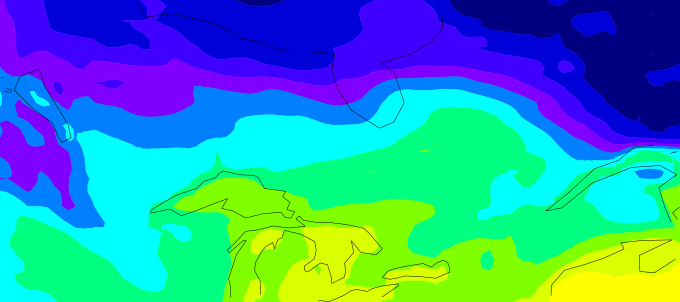

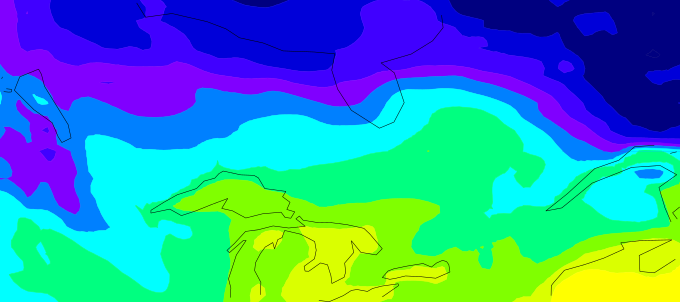

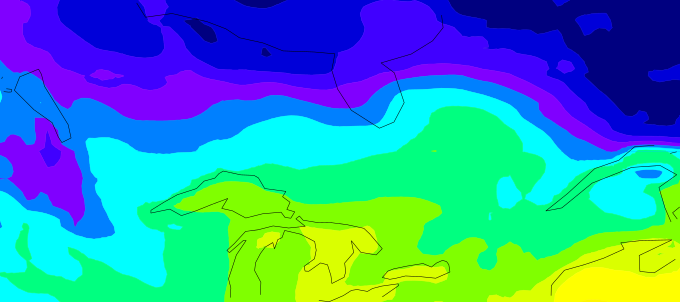

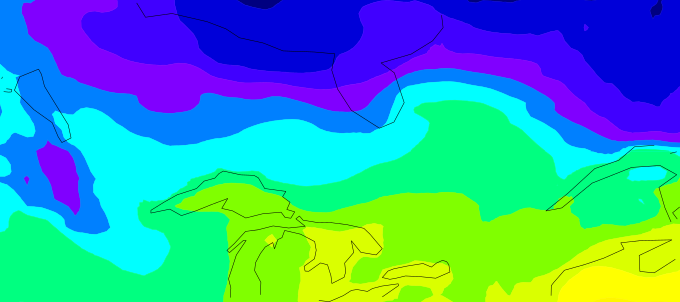

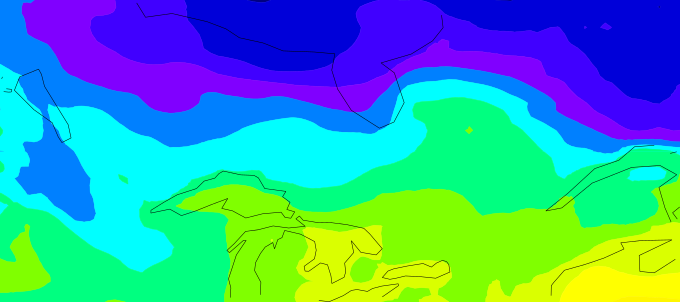

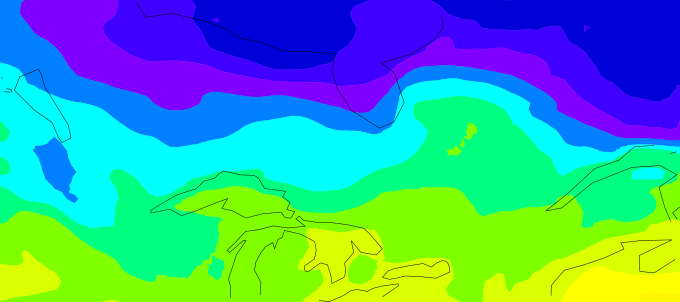

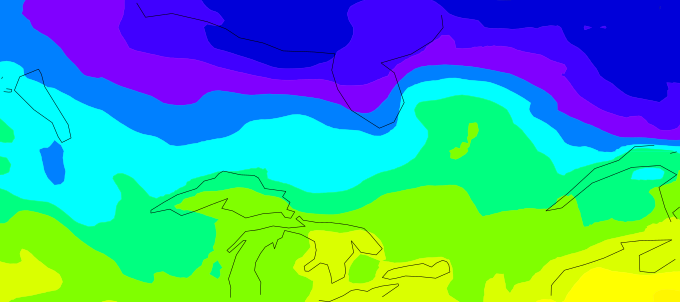

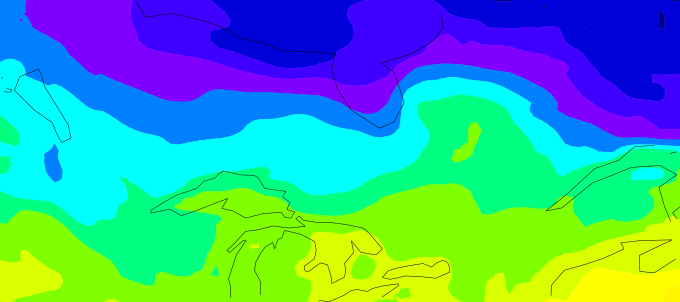

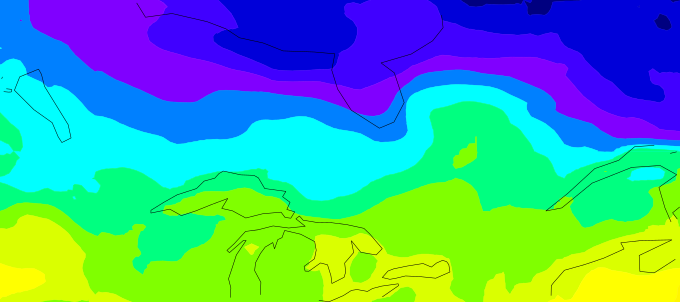

KeyboardInterrupt: ignored

In [ ]:
for s in source:
    cml.plot_map(s)

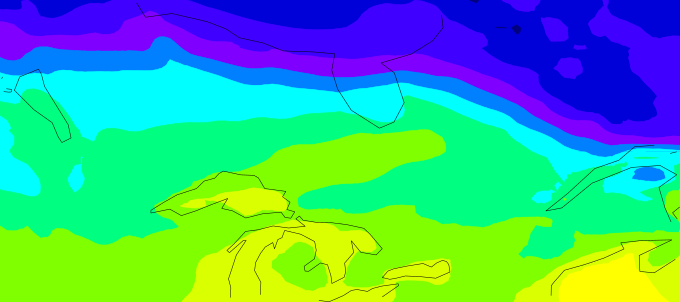

In [ ]:
cml.plot_map((source[0], source[1]))

In [ ]:
source.to_xarray()

In [ ]:
#This code defines several dictionaries and lists to help with mapping variables and their names in climate models. 
#These codes should be run each time.

NAME_TO_CMIP = {
    "geopotential": "zg",
    "u_component_of_wind": "ua",
    "v_component_of_wind": "va",
    "temperature": "ta",
    "relative_humidity": "r",
    "specific_humidity": "hus",
}

NAME_TO_VAR = {
    "2m_temperature": "t2m",
    "10m_u_component_of_wind": "u10",
    "10m_v_component_of_wind": "v10",
    "mean_sea_level_pressure": "msl",
    "surface_pressure": "sp",
    "toa_incident_solar_radiation": "tisr",
    "total_precipitation": "tp",
    "land_sea_mask": "lsm",
    "orography": "orography",
    "lattitude": "lat2d",
    "geopotential": "z",
    "u_component_of_wind": "u",
    "v_component_of_wind": "v",
    "temperature": "t",
    "relative_humidity": "r",
    "specific_humidity": "q",
    "vorticity": "vo",
    "potential_vorticity": "pv",
    "total_cloud_cover": "tcc",
}

VAR_TO_NAME = {v: k for k, v in NAME_TO_VAR.items()}

SINGLE_LEVEL_VARS = [
    "2m_temperature",
    "10m_u_component_of_wind",
    "10m_v_component_of_wind",
    "mean_sea_level_pressure",
    "surface_pressure",
    "toa_incident_solar_radiation",
    "total_precipitation",
    "total_cloud_cover",
    "land_sea_mask",
    "orography",
    "lattitude",
]

PRESSURE_LEVEL_VARS = [
    "geopotential",
    "u_component_of_wind",
    "v_component_of_wind",
    "temperature",
    "relative_humidity",
    "specific_humidity",
    "vorticity",
    "potential_vorticity",
]

DEFAULT_PRESSURE_LEVELS = [50, 250, 500, 600, 700, 850, 925]

CONSTANTS = ["orography", "lsm", "slt", "lat2d", "lon2d"]

NAME_LEVEL_TO_VAR_LEVEL = {}

for var in SINGLE_LEVEL_VARS:
    NAME_LEVEL_TO_VAR_LEVEL[var] = NAME_TO_VAR[var]

for var in PRESSURE_LEVEL_VARS:
    for l in DEFAULT_PRESSURE_LEVELS:
        NAME_LEVEL_TO_VAR_LEVEL[var + "_" + str(l)] = NAME_TO_VAR[var] + "_" + str(l)

VAR_LEVEL_TO_NAME_LEVEL = {v: k for k, v in NAME_LEVEL_TO_VAR_LEVEL.items()}

In [ ]:
source.to_xarray()

In [ ]:
# Download data from copernicus (~15-20 mins)
# Generate API KEY: https://cds.climate.copernicus.eu/api-how-to
# api_key = "154140:40d3d2e0-ed2c-4f60-8bc8-d15789841be0" # Change to your_api_key
# download(source = "copernicus", variable = "2m_temperature", dataset = "era5", year = 1979, api_key = api_key)

**To download copernicus data, I rewrite some relevant parts of the source codes, the block code below should be run each time.**

In [ ]:
from mmap import ACCESS_READ
#@title def download_copernicus
# Standard library
import argparse
import os
import subprocess

# Local application
#from .constants import NAME_TO_CMIP

# Third party
import cdsapi


months = [str(i).rjust(2, "0") for i in range(1, 13)]
days = [str(i).rjust(2, "0") for i in range(1, 32)]
times = [str(i).rjust(2, "0") + ":00" for i in range(0, 24)]

# TODO: write exceptions in the docstrings
# TODO: figure out how to better specify legal args for dataset, variable,
#   and resolution
# TODO: for download ESGF, do we have to download all the years?
# TODO: can main even be run without runtime warning? maybe we should get rid of it


def download_copernicus(root, dataset, variable, year, resolution, area, pressure=False, api_key=None):
    """Downloads data from the Copernicus Climate Data Store (CDS).
        Data is stored at `root/dataset/variable/` as NetCDF4 (`.nc`) files.
        Skips the download if a file of the expected naming convention already
        exists at the download destination. More info:
        https://cds.climate.copernicus.eu/cdsapp#!/home

    :param root: The root data directory.
    :type root: str
    :param dataset: The dataset to download. Currently, only "era5" is
        supported.
    :type dataset: str
    :param variable: The variable to download from the specified dataset.
    :type variable: str
    :param pressure: Whether to download data from different pressure levels
        instead of single-level. Defaults to `False`.
    :type pressure: bool, optional
    :param api_key: An API key for accessing CDS. Defaults to `None`. See here
        for more info: https://cds.climate.copernicus.eu/api-how-to.
    :type api_key: str, optional
    """
    if dataset not in ["era5"]:
        raise Exception("Dataset not supported")

    if api_key is not None:
        content = f"url: https://cds.climate.copernicus.eu/api/v2\nkey: {api_key}"
        open(f"{os.environ['HOME']}/.cdsapirc", "w").write(content)

    path = os.path.join(root, dataset, resolution, variable, f"{variable}_{year}_{resolution}deg.nc")
    print(
        f"Downloading {dataset} {variable} data for year {year} from copernicus to {path}"
    )

    if os.path.exists(path):
        return

    os.makedirs(os.path.dirname(path), exist_ok=True)

    download_args = {
        "product_type": "reanalysis",
        "format": "netcdf",
        "variable": variable,
        "year": str(year),
        "month": months,
        "day": days,
        "time": times,
        "area": area,
        "grid": [str(resolution), str(resolution)]
    }

    client = cdsapi.Client()

    if not pressure:
        client.retrieve(
            "reanalysis-era5-single-levels",
            download_args,
            path,
        )
    else:
        download_args["pressure_level"] = [1000, 850, 500, 50]
        client.retrieve(
            "reanalysis-era5-pressure-levels",
            download_args,
            path,
        )


**This code below is used to download the regional copernicus data. The years and areas should be defined on your own. The API KEY would be achieved by registering an account[here](https://cds.climate.copernicus.eu/user/register). After that, you will find your api_key from [here](https://cds.climate.copernicus.eu/api-how-to).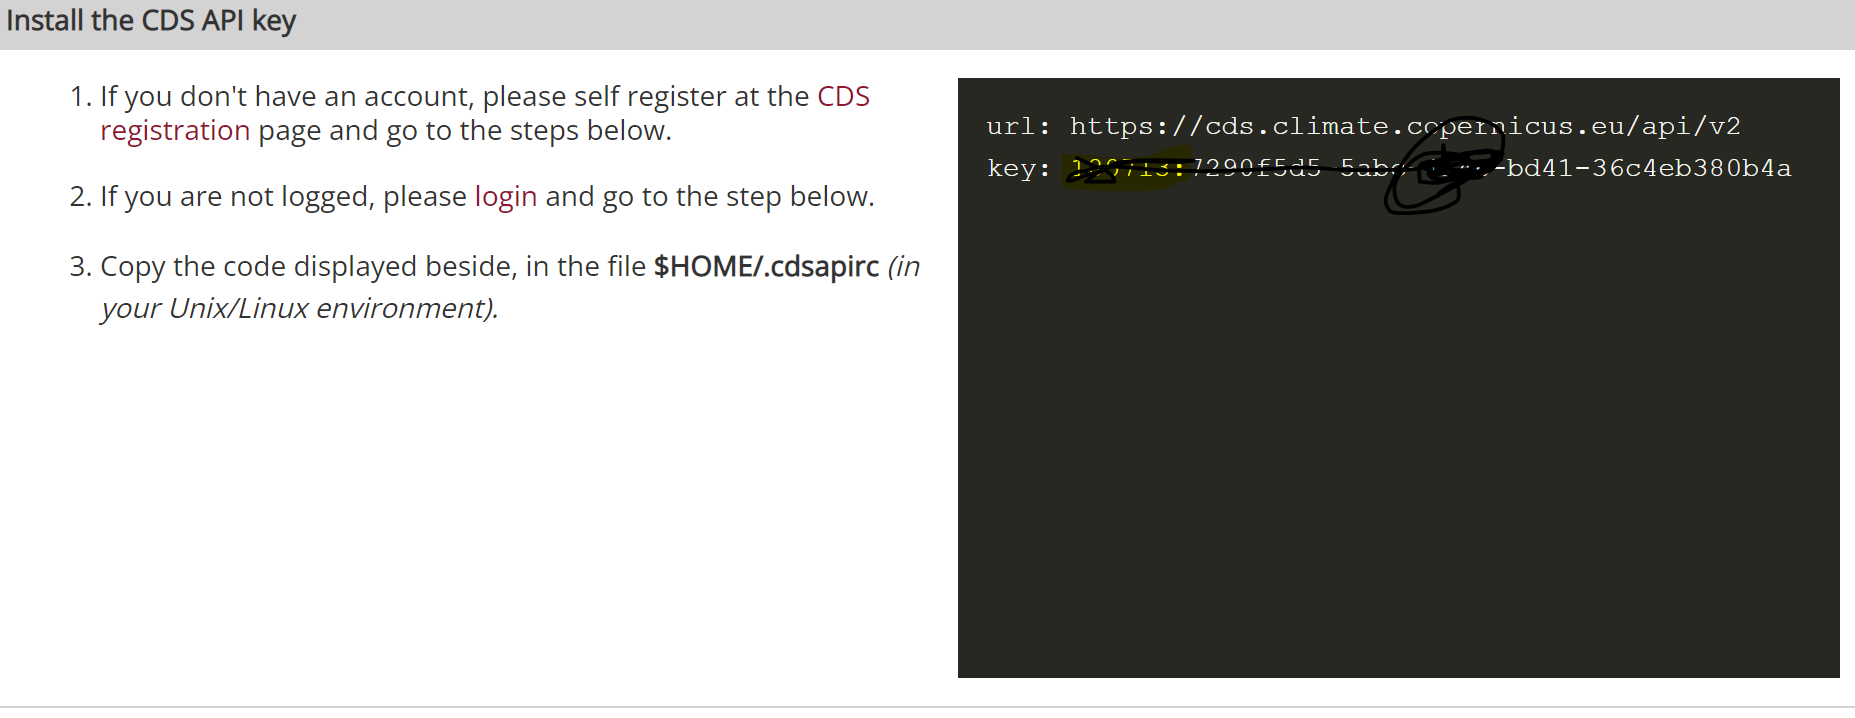:**

In [ ]:
#@title # Loop over the years and download the data for each year  ERA5 { run: "auto" }
# Define the years list
years = []
for y in range(1975, 2023):
    years.append(str(y))

# Define the API key
api_key = "UID:API_KEY" # Change to your_api_key

# Define the root directory for data downloads
root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial"

# Define the dataset and variable to download



dataset = "era5"
variable = "2m_temperature"

#This method of selecting an area of interest can be seen here.: https://youtu.be/EIe7IBMqhsw
'''
The area list corresponds to the latitude and longitude boundaries of the region of interest in the xarray dataset.

The first and third elements of the area list correspond to the minimum and maximum latitude values of the region of interest, respectively. In this case, the minimum latitude is -5.2 and the maximum latitude is 31.

The second and fourth elements of the area list correspond to the minimum and maximum longitude values of the region of interest, respectively. In this case, the minimum longitude is 34 and the maximum longitude is 45.

The latitude and longitude coordinates in the xarray dataset should fall within these boundary values to be considered part of the region of interest.

'''


area = [58, -100, 42, -64]

resolution = str(0.5)

# Loop over the years and download the data for each year
for i, year in enumerate(years):
    #download_copernicus(root=root_dir, dataset=dataset, variable=variable, year=year, api_key=api_key)
    download_copernicus(root=root_dir, dataset=dataset, variable=variable, year=year, resolution=resolution, area=area, pressure=False, api_key=api_key)


In [ ]:
# Download data from weatherbench (~2-3 minutes)
#download(root = "/content/drive/MyDrive/Climate/.climate_tutorial", source = "weatherbench", variable = "2m_temperature", dataset = "era5", resolution = "5.625")

ERA5 dataset directory structure from the Weatherbench source.

```
|-- 5.625deg
|   |-- 2m_temperature
|       |-- 2m_temperature_1979_5.625deg.nc
|       |-- 2m_temperature_1980_5.625deg.nc
|       |-- ...
|       |-- 2m_temperature_2018_5.625deg.nc
```

## Data Preprocessing


The data is stored in the [NetCDF](https://en.wikipedia.org/wiki/NetCDF) files with _.nc_ extension. One of the distinct features of this format is the **named** specification to the coordinates and the data variables. 

As shown below, we first merge all the yearly NetCDF files, and display the structure of the format. xarray library is used to read the NetCDF files. It allows the users to manipulate data based on more informative labels instead of integer location. 



In [ ]:
#@title load_dataset, View
# Standard library
import os

# Third party
from IPython.display import display
import xarray as xr


def load_dataset(dir):
    """
    Loads a dataset from a directory of NetCDF files.
    :param dir: The directory to open.
    :type dir: str
    :return: An xarray dataset object.
    :rtype: xarray.Dataset
    """
    return xr.open_mfdataset(os.path.join(dir, "*.nc"))


def view(dataset):
    """
    Displays the given dataset in the current IPython notebook.
    :param dataset: The dataset to show.
    :type dataset: xarray.Dataset
    """
    display(dataset)

In [ ]:
from climate_learn.utils.data import load_dataset, view

#dataset = load_dataset("/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/5.625/2m_temperature")
#view(dataset)

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 350640)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [ ]:
from climate_learn.utils.data import load_dataset, view

dataset2 = load_dataset("/content/drive/MyDrive/Climate/.climate_tutorial/era5/0.5/2m_temperature/")
view(dataset2)

,Array,Chunk
Bytes,7.55 GiB,161.44 MiB
Shape,"(420768, 33, 73, 2)","(8784, 33, 73, 2)"
Count,239 Tasks,48 Chunks
Type,float32,numpy.ndarray


In [ ]:
#@title Class ERA5(Must Run)
import os
import glob
import xarray as xr
import numpy as np

from tqdm import tqdm
from typing import Callable, Dict, Iterable, Sequence
from climate_learn.data.climate_dataset import ClimateDataset
from climate_learn.data.climate_dataset.args import ERA5Args
'''
from ..constants import (
    NAME_TO_VAR,
    DEFAULT_PRESSURE_LEVELS,
    CONSTANTS,
    SINGLE_LEVEL_VARS,
    PRESSURE_LEVEL_VARS,
)
'''

class ERA5(ClimateDataset):
    args_class: Callable[..., ERA5Args] = ERA5Args

    def __init__(self, data_args: ERA5Args) -> None:
        super().__init__(data_args)
        self.root_dir: str = data_args.root_dir
        self.years: Iterable[int] = data_args.years

    def setup(self) -> None:
        self.constant_names: Sequence[str] = []
        self.data_dict: Dict[str, xr.core.dataarray.DataArray] = self.load_from_nc(
            self.root_dir
        )
        self.set_lat_lon()

    def load_from_nc(self, data_dir: str) -> Dict[str, xr.core.dataarray.DataArray]:
        self.constant_names = [
            name for name in self.variables if NAME_TO_VAR[name] in CONSTANTS
        ]
        self.constants: Dict[str, xr.core.dataarray.DataArray] = {}
        if len(self.constant_names) > 0:
            ps = glob.glob(os.path.join(data_dir, "constants", "*.nc"))
            all_constants = xr.open_mfdataset(ps, combine="by_coords")
            for name in self.constant_names:
                self.constants[name] = all_constants[NAME_TO_VAR[name]]

        non_const_names = [
            name for name in self.variables if name not in self.constant_names
        ]
        data_dict = {}
        for name in non_const_names:
            if name in SINGLE_LEVEL_VARS:
                data_dict[name] = []
            elif name in PRESSURE_LEVEL_VARS:
                for level in DEFAULT_PRESSURE_LEVELS:
                    data_dict[f"{name}_{level}"] = []
            else:
                raise NotImplementedError(
                    f"{name} is not either in single-level or pressure-level dict"
                )

        for year in tqdm(self.years):
            for var in non_const_names:
                dir_var = os.path.join(data_dir, var)
                ps = glob.glob(os.path.join(dir_var, f"*{year}*.nc"))
                xr_data = xr.open_mfdataset(ps, combine="by_coords")
                xr_data = xr_data[NAME_TO_VAR[var]]
                # np_data = xr_data.to_numpy()
                if len(xr_data.shape) == 3:  # 8760, 32, 64
                    xr_data = xr_data.expand_dims(dim="level", axis=1)
                    data_dict[var].append(xr_data)
                else:  # pressure level
                    for level in DEFAULT_PRESSURE_LEVELS:
                        xr_data_level = xr_data.sel(level=[level])
                        data_dict[f"{var}_{level}"].append(xr_data_level)

        data_dict = {k: xr.concat(data_dict[k], dim="time") for k in data_dict.keys()}
        # precipitation and solar radiation miss a few data points in the beginning
        len_min = min([data_dict[k].shape[0] for k in data_dict.keys()])
        data_dict = {k: data_dict[k][-len_min:] for k in data_dict.keys()}

        # remove constants from variables
        self.variables = list(data_dict.keys())
        return data_dict
#latitude, longitude
    def set_lat_lon(self) -> None:
        # lat lon is stored in each of the nc files, just need to load one and extract
        dir_var = os.path.join(self.root_dir, self.variables[0])
        year = self.years[0]
        ps = glob.glob(os.path.join(dir_var, f"*{year}*.nc"))
        xr_data = xr.open_mfdataset(ps, combine="by_coords")
        #self.lat: np.ndarray = xr_data["lat"].to_numpy()
        #self.lon: np.ndarray = xr_data["lon"].to_numpy()
        self.lat: np.ndarray = xr_data["latitude"].to_numpy()
        self.lon: np.ndarray = xr_data["longitude"].to_numpy()


ERA5Args._data_class = ERA5

## Data Conversion
We further convert the *NetCDF* files to *PyTorch* Dataloaders.

**Pros**: We can use the dataloaders for training and evaluating neural networks.\
**Cons**: We loose useful meta information (such as 'time', 'location') during conversion as dataloaders only allow for integer location based treatment. 

We store the useful information about
 the data ('lat', 'long') of the regions as _data members_ of our dataloaders.





### Example

- In the given example, we train our model from the data from 1979 (start train year) -2015, validate it from the data from 2015 (start validation year) - 2016, and test it on data from 2017 (start test year) - 2018 (end test year).
- We split the data this way as it allows us to test the temporal generalization of our models. Additionally, it replicates more practical setting where the model that is trained on the historical data is used for forecasting in the future.
- pred_range = Days(3) indicates that we are going to predict 3 days in the future.
- subsample = Hours(6) indicates that we shall use the data at every 6 hours from 24 hours of the data from a single day i.e., rather than using data at 12am, 1am, 2am...11pm from a single day, we shall use the data at 12am, 6am, 12pm, 6pm. As climate variables are highly correlated within a window of a few hours, subsampling helps in removing those redundancies during training.


"/content/drive/MyDrive/Climate/.climate_tutorial"

In [ ]:
from climate_learn.utils.datetime import Year, Days, Hours
from climate_learn.data.climate_dataset.args import ERA5Args
from climate_learn.data.tasks.args import ForecastingArgs
from climate_learn.data import DataModuleArgs, DataModule

data_args = ERA5Args(
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/2m_temperature/0.25/",
    #root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/5.625/",
    root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/era5/",
    variables = ["2m_temperature"],
    years = range(1975, 2012),
)

forecasting_args = ForecastingArgs(
    dataset_args = data_args,
    in_vars = ["2m_temperature"],
    out_vars = ["2m_temperature"],
    pred_range = 3*24,
    subsample = 6,
)

data_module_args = DataModuleArgs(
    task_args = forecasting_args,
    train_start_year = 1975,
    val_start_year = 2014,
    test_start_year = 2015,
    end_year = 2016,
)

data_module = DataModule(
    data_module_args = data_module_args,
    batch_size = 128,
    num_workers = 1
)


Creating train dataset


100%|██████████| 38/38 [00:20<00:00,  1.88it/s]


Creating val dataset


100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


Creating test dataset


100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


In [ ]:
print(DataModule)

## Neural Networks Architectures

We consider three deep neural network architectures for in this tutorial.

1. Convolutional Neural Networks (CNN)
<center><img src="https://viso.ai/wp-content/uploads/2021/03/cnn-convolutional-neural-networks-1060x362.jpg" width=400></center>

CNN is a widely used neural network architecture for visual recognition. A CNN is a constrainted version of a regular neural network that takes advantage of the prior knowledge that the input is an image. The architecture can be flexibly adapted to various image resolutions. 

For our use case, the latitude-longitude gridded data is treated as an image composed of climate variables in its channel instead of the Red-Green-Blue (RGB) information.

Resource(s): https://cs231n.github.io/convolutional-networks/ 

Among the long list of CNN variants availablely, we provide support for its popular variants. 


Variants of CNN architecture: \

a. **ResNet**

<center><img src="https://miro.medium.com/max/875/1*WpX_8eCeTsEcCs8vdXtUCw.png" width=400></center>

ResNets have been used to achieve SOTA weather forecasting using neural networks for temperature and geopotential in [1]. 

Paper: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

b. **U-Net**

<center><img src="https://miro.medium.com/max/875/1*f7YOaE4TWubwaFF7Z1fzNw.png" width=400></center>

The basic building blocks of the U-Net architecture involve downsampling as well as upsampling convolutions. The downsampling blocks project the input from higher dimension to a lower dimension, and upsampling blocks project the low dimension latent space to the higher dimension input space. After gaining popularity in the Biomedical domain, our package allows the users to benchmark U-Net in the Climate modeling space too.


Paper: [U-Net: Convolutional Networks for Biomedical Image Segmentation
](https://arxiv.org/abs/1505.04597) 



2. Vision Transformers

Vision transformers are the latest contemporary to CNN variants for visual recognition. We relegate the audience to the related paper for its architectural details.

<center><img src="https://viso.ai/wp-content/uploads/2021/09/vision-transformer-vit.png" width=400></center>

Vision Transformers have gained immense popularity in the Vision community, and its usefulness to learn representations of climate variables is still under-explored. [2] used Transformers for short-range temperature forecasting.
We believe that our ViT implementation shall allow the users to benchmark ViT on climate modeling tasks.

Paper: <a href="https://arxiv.org/abs/2010.11929">An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale</a>

<br/><br/>


**References**:

[1] Rasp S, Thuerey N. Data‐driven medium‐range weather prediction with a resnet pretrained on climate simulations: A new model for weatherbench. Journal of Advances in Modeling Earth Systems. 2021 Feb;13(2):e2020MS002405.\
[2] Bilgin O, Mąka P, Vergutz T, Mehrkanoon S. TENT: Tensorized encoder transformer for temperature forecasting. arXiv preprint arXiv:2106.14742. 2021 Jun 28.



<br/><br/>

In this tutorial, we shall demonstrate the training of a resnet from scratch. It is important to note that the choice of model architecture and hyperparameters are for demonstration purposes only. 

## Model initialization 

The hyperparameters and ResNet architecture chosen allow for a model that forecasts with 85.7% test accuracy, while still training within a reasonable amount of time for the sake of the tutorial (by nature of being a smaller model). We leave it to the user to perform a more exhaustive search of hyperparameter values for training models that perform better.

In [ ]:
from climate_learn.models import load_model

model_kwargs = {
    "in_channels": len(data_module.hparams.data_module_args.train_task_args.in_vars),
    "out_channels": len(data_module.hparams.data_module_args.train_task_args.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
#model_module = load_model(name = "vit", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

In [ ]:
'''
from climate_learn.models import load_model

# model_kwargs = {
#     "img_size": [32, 64],
#     "patch_size": 2,
#     "drop_path": 0.1,
#     "drop_rate": 0.1,
#     "learn_pos_emb": True,
#     "in_vars": data_module.hparams.in_vars,
#     "out_vars": data_module.hparams.out_vars,
#     "embed_dim": 128,
#     "depth": 8,
#     "decoder_depth": 0,
#     "num_heads": 4,
#     "mlp_ratio": 4,
# }

model_kwargs = {
    "in_channels": len(data_module.hparams.in_vars),
    "out_channels": len(data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

# model_module = load_model(name = "vit", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
# model_module = load_model(name = "unet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
'''

In [ ]:
from climate_learn.models import set_climatology
set_climatology(model_module, data_module)

## Training


The training objective ensures that the machine learning model makes accurate forecasts over the gridded data. We employ latitude weighted RMSE given by:

<br>
$RMSE = \frac{1}{N_{forecasts}}\sum_{i}^{N_{forecasts}}\sqrt{\frac{1}{N_{lat}N_{lon}}\sum_{j}^{N_{lat}}\sum_{k}^{N_{lon}}L(j)(f_{i,j,k}-t_{i,j,k})^{2}} \tag{1}$ 
<br>

where $f$ is the model forecast and $t$ is the ERA5 truth. $L(j)$ is the latitude weighing factor at the $j^{th}$ latitude index:

<br>
$L(j) = \frac{cos(lat(j))}{\frac{1}{N_{lat}}\sum_{j}^{N_{lat}}cos(lat(j))} \tag{2}$
<br>

(Optional) If you want to monitor training and validation curves of the model using [Weights and Biases](https://docs.wandb.ai/), uncomment the lines in the following code block and login to your Wandb account (only once).

In [ ]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "cpu",
    precision = 16,
    max_epochs = 5,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)

In [ ]:
trainer.fit(model_module, data_module)

## Evaluation 


Once our prediction model is trained, we want to be able to evaluate it against the ground truth labels for data samples in the test set. 

In addition to the Latitude weighted RMSE (Eq. 1), we shall look at the Anomaly Correlation Coefficient (ACC) which is defined as:

<br>
$ACC = \frac{\sum_{i,j,k}L(j)f'_{i,j,k}t'_{i,j,k}}{\sqrt{\sum_{i,j,k}L(j)f'^{2}_{i,j,k}L(j)t'^{2}_{i,j,k}}} \tag{3}$
<br>

where $'$ denotes the difference to the climatology. We define climatology as:

<br>
$climatology_{j,k} = \frac{1}{N_{time}}\sum{t_{j,k}}\tag{4}$
<br>

For the RMSE metric, we compare the deep learning model with a climatological forecast.

In [ ]:
trainer.test(model_module, data_module)

The model's prediction has a strong correlation with the ground truth, which is indicated by a high ACC value. Compared to a climatological forecast, the deep learning model achieves a much smaller RMSE error.

## Visualization 

We visualize the **bias**, given by the difference in the predicted and the ground truth values, to better analyze our learned model.

Visualization is done on the test set. We can either specify exact time for the initial condition, or randomly sample from the test set.

In [ ]:
from climate_learn.utils import visualize

# if samples = 2, we randomly pick 2 initial conditions in the test set
visualize(model_module, data_module, samples = ["2015-06-01:12", "2015-08-01:18"])

The visualization shows that the model makes reasonably accurate predictions in most parts of the globe, and the prediction well correlates with the ground truth. The model seems to make large errors near the two poles, where the temperature is more unpredictable. We can improve the accuracy of the model by either including more input variables, using a more expressive model, or training for longer. For the sake of this tutorial, we use a small model and only train for a short time.

In addition to visualizing the bias the model makes for each individual data point, we can also visualize the mean bias across the entire test set.

In [ ]:
import torch
from tqdm import tqdm

def visualize_mean_bias(model_module, data_module, save_dir = None):
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok = True)

    loader = data_module.test_dataloader()

    all_mean_bias = []
    for batch in tqdm(loader):
      x, y, _, _ = batch # B, 1, 32, 64
      x = x.to(model_module.device)
      y = y.to(model_module.device)
      pred = model_module.forward(x) # B, 1, 32, 64

      inv_normalize = model_module.denormalization
      init_condition, gt = inv_normalize(x), inv_normalize(y)
      pred = inv_normalize(pred)
      bias = pred - gt # B, 1, 32, 64
      mean_bias = bias.mean(dim=0)
      all_mean_bias.append(mean_bias)
    
    all_mean_bias = torch.stack(all_mean_bias, dim=0)
    mean_bias = torch.mean(all_mean_bias, dim=0)

    fig, axes = plt.subplots(1, 1, figsize=(12, 4), squeeze = False)
    ax = axes[0,0]

    im = ax.imshow(mean_bias.detach().squeeze().cpu().numpy())
    im.set_cmap(cmap=plt.cm.RdBu)
    fig.colorbar(im, ax=ax)
    ax.set_title("Mean bias [Kelvin]")

    fig.tight_layout()
    
    if save_dir is not None:
        plt.savefig(os.path.join(save_dir, 'visualize_mean_bias.png'))
    else:
        plt.show()
  
visualize_mean_bias(model_module.cuda(), data_module)

In [ ]:
# # from climate_tutorial.utils import visualize

# import os
# import random
# import numpy as np
# from datetime import datetime
# from plotly.express import imshow
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# # more use cases for visualize, make a more intuitive api
# # which split of the data? train/val/test? currently test with a random data point
# # timestamp that we are visualizing?
# # only timestamp works -- can infer the split, we don't have the timestamp info for now -> include it in the dataloader
# # number: 5 data points

# # add lat long information 
# # plotly to zoom in

# samples = ["2017-01-01:12", "2017-02-01:18"]
# def visualize(model_module, data_module, split = "test", samples = samples):
#     # dataset.setup()
#     dataset = eval(f"data_module.{split}_dataset")

#     if(type(samples) == int):
#         idxs = random.sample(range(0, len(dataset)), samples)
#     elif(type(samples) == list):
#         idxs = [np.searchsorted(dataset.time, np.datetime64(datetime.strptime(dt, "%Y-%m-%d:%H"))) for dt in samples]
#     else:
#         raise Exception("Invalid type for samples; Allowed int or list[datetime.datetime or np.datetime64]")

#     # print(dataset.time[idxs[0]])
#     # row_titles = [datetime.strftime(None, "%Y-%m-%d:%H") for idx in idxs]

#     if(data_module.hparams.task == "forecasting"):
#         col_titles = ["Initial condition", "Ground truth", "Prediction", "Bias"]
#     elif(data_module.hparams.task == "downscaling"):
#         col_titles = ["Low resolution data", "High resolution data", "Downscaled", "Bias"]
#     else:
#         raise NotImplementedError

#     fig = make_subplots(len(idxs), 4, subplot_titles = col_titles * len(idxs))
#     for i, idx in enumerate(idxs):
#         x, y, _, _ = dataset[idx] # 1, 1, 32, 64
#         pred = model_module.forward(x.unsqueeze(0)) # 1, 1, 32, 64

#         inv_normalize = model_module.denormalization
#         init_condition, gt = inv_normalize(x), inv_normalize(y)
#         pred = inv_normalize(pred)
#         bias = pred - gt

#         for j, tensor in enumerate([init_condition, gt, pred, bias]):
#             fig.add_trace(imshow(tensor.detach().squeeze().cpu().numpy(), color_continuous_scale = "rdbu", x = dataset.inp_lon if i == 0 else dataset.out_lon, y = dataset.inp_lat if i == 0 else dataset.out_lat).data[0], row = i + 1, col = j + 1)
#             # fig.colorbar(im, ax=ax)

#     # fig.tight_layout()
#     fig.show()

# visualize(model_module, data_module)

<a name="spatial-downscaling"></a>
# Spatial Downscaling


General Circulation Models (GCMs) provide us with the future projections of climate scenarios. These raw estimates have to be downscaled at the desired resolution for actionable guidance.

<br>
<center><img src="https://drive.google.com/uc?export=view&id=11i2CIRxlVRqOHIgZRABwF05Qf5KeqVwc" height=300></center>

In practice, statistical spatial downscaling can be used to make predictions about a climate variable (a) over the latitude-longitude grid of **higher** resolution than the input grid and (b) on specific sites at the target locations. For example, we can predict the temperature at a specific station in Germany based on the gridded temperature data over the whole country.

Major class of statistical downscaling models include Perfect Prognosis (PP) [1] that aims at learning a transfer function $$\hat{y} = f(x, Z)$$ where $y$ is the true value at location $x$ and $Z$ are the set of model predictors for the climate model. The various PP models differ in their realization of the transfer function $f$. Related works in [2] provides deeper details into the previous works. In [2,3], the authors use CNNs as the transfer function, broadly due to its inherent inductive bias towards handling Vision data. The ability of Deep CNNs to perform super-resolution is a well-explored field of study [4].

<br/><br/>

**References:**
1. Maraun D, Wetterhall F, Ireson AM, Chandler RE, Kendon EJ, Widmann M, Brienen S, Rust HW, Sauter T, Themeßl M, Venema VK. Precipitation downscaling under climate change: Recent developments to bridge the gap between dynamical models and the end user. Reviews of geophysics. 2010 Sep;48(3).
2. Vaughan A, Tebbutt W, Hosking JS, Turner RE. Convolutional conditional neural processes for local climate downscaling. arXiv preprint arXiv:2101.07950. 2021 Jan 20.
3. Baño-Medina J, Manzanas R, Gutiérrez JM. Configuration and intercomparison of deep learning neural models for statistical downscaling. Geoscientific Model Development. 2020 Apr 28;13(4):2109-24.
4. Yamanaka J, Kuwashima S, Kurita T. Fast and accurate image super resolution by deep CNN with skip connection and network in network. InInternational Conference on Neural Information Processing 2017 Nov 14 (pp. 217-225). Springer, Cham.

- In this tutorial, we shall focus on mapping the coarse resolution data for a variable to a finer resolution at a given time stamp. Specifically, we shall continue with focusing on the _Temperature at 2m_ climate variable using a ResNet model.

## Data Download

To perfrom climate downscaling, we need to have data for the temperature at 2m at different resolutions. In addition to the 5.625deg dataset we downloaded above, here we download the 2.8125deg dataset, which divides the Earth's surface into a latitude x longitude grid of 64 x 128.

In [ ]:
from climate_learn.data import download

# Download data from weatherbench (~2-3 minutes)
# download(root = "/content/drive/MyDrive/Climate/.climate_tutorial", source = "weatherbench", variable = "2m_temperature", dataset = "era5", resolution = "5.625")
# Download data from weatherbench (~4-6 minutes)
download(root = "/content/drive/MyDrive/Climate/.climate_tutorial", source = "weatherbench", variable = "2m_temperature", dataset = "era5", resolution = "2.8125")

## Data Conversion

In [ ]:
from climate_learn.utils.datetime import Year, Days, Hours
from climate_learn.data import DataModule

data_module = DataModule(
    dataset = "ERA5",
    task = "downscaling",
    root_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/5.625",
    root_highres_dir = "/content/drive/MyDrive/Climate/.climate_tutorial/data/weatherbench/era5/2.8125",
    in_vars = ["2m_temperature"],
    out_vars = ["2m_temperature"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    subsample = Hours(6),
    batch_size = 128,
    num_workers = 1
)

## Model initialization

In [ ]:
from climate_learn.models import load_model

# model_kwargs = {
#     "img_size": [32, 64],
#     "patch_size": 4,
#     "drop_path": 0.1,
#     "drop_rate": 0.1,
#     "learn_pos_emb": True,
#     "in_vars": data_module.hparams.in_vars,
#     "out_vars": data_module.hparams.out_vars,
#     "upsampling": data_module.train_dataset.downscale_ratio,
#     "embed_dim": 128,
#     "depth": 8,
#     "decoder_depth": 0,
#     "num_heads": 4,
#     "mlp_ratio": 4,
# }

model_kwargs = {
    "in_channels": len(data_module.hparams.in_vars),
    "out_channels": len(data_module.hparams.out_vars),
    "upsampling": data_module.train_dataset.downscale_ratio,
    "n_blocks": 4,
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

# model_module = load_model(name = "vit", task = "downscaling", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
model_module = load_model(name = "resnet", task = "downscaling", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
# model_module = load_model(name = "unet", task = "downscaling", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

In [ ]:
# latitude long info, 
from climate_learn.models import set_climatology
set_climatology(model_module, data_module)

## Training

In [ ]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    # logger = WandbLogger(project = "climate_tutorial", name = "downscale-vit")
)

In [ ]:
trainer.fit(model_module, data_module)

## Evaluation

In [ ]:
trainer.test(model_module, data_module)

## Visualization 

In [ ]:
# from climate_tutorial.utils import visualize
# visualize(model_module, data_module)
visualize(model_module, data_module, samples = ["2017-06-01:12", "2017-08-01:18"])

## Potential Applications of the Tutorial


1. Our package with this tutorial makes it easy for the practitioners to focus on the machine learning model design and evaluate their models against standard benchmarks such as Weatherbench ([Leaderboard](https://github.com/pangeo-data/WeatherBench)) using our evaluation support. 
2. The climate experts can load and train their customized machine learning models with various hyperparameters. For instance, they can study the effect of varying the capacity of machine learning models on its predictions.
3. To best of our knowledge, this is the only package that provides support for temporal forecasting and spatial downscaling under the hood. It helps the forecasting community to benefit from the improvements in modeling downscaling and vice-versa.

## Limitations


1. Due to the noise involved in capturing climate variables, climate modeling is particularly a challenging task. Different datasets such as ERA5, CMIP6 may contain different values for a particular climate variable. 
2. This tutorial does not cover the aspect of uncertainity in the model predictions. We shall add more capabilities to our models in the package for climate modelers to quantify the error in the predicted output.
3. There is a massive amount of climate data available (~10 TBs), our tutorial does not cover aspects of how to deal with the data at that scale which might be important for capturing more sophisticated climate phenomenon.